# Calibrated Explanations — Tiny Quickstart

Learning objectives:
- Run a minimal example locally using scikit-learn toy data.
- Produce a factual explanation (with uncertainty) for one instance.
- Produce alternative explanations for the same instance.

Time to run: ~1–3 minutes (depending on CPU)

In [1]:
# Minimal imports and data
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

from calibrated_explanations import CalibratedExplainer

# Load toy data and split
data = load_breast_cancer(as_frame=True)
X = data.data.values.astype(float)
y = data.target.values.astype(int)
feature_names = list(data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_prop_train, X_cal, y_prop_train, y_cal = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Train a small model
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_prop_train, y_prop_train)

print('Model trained on small dataset')

Model trained on small dataset


Factual explanation object created for single instance


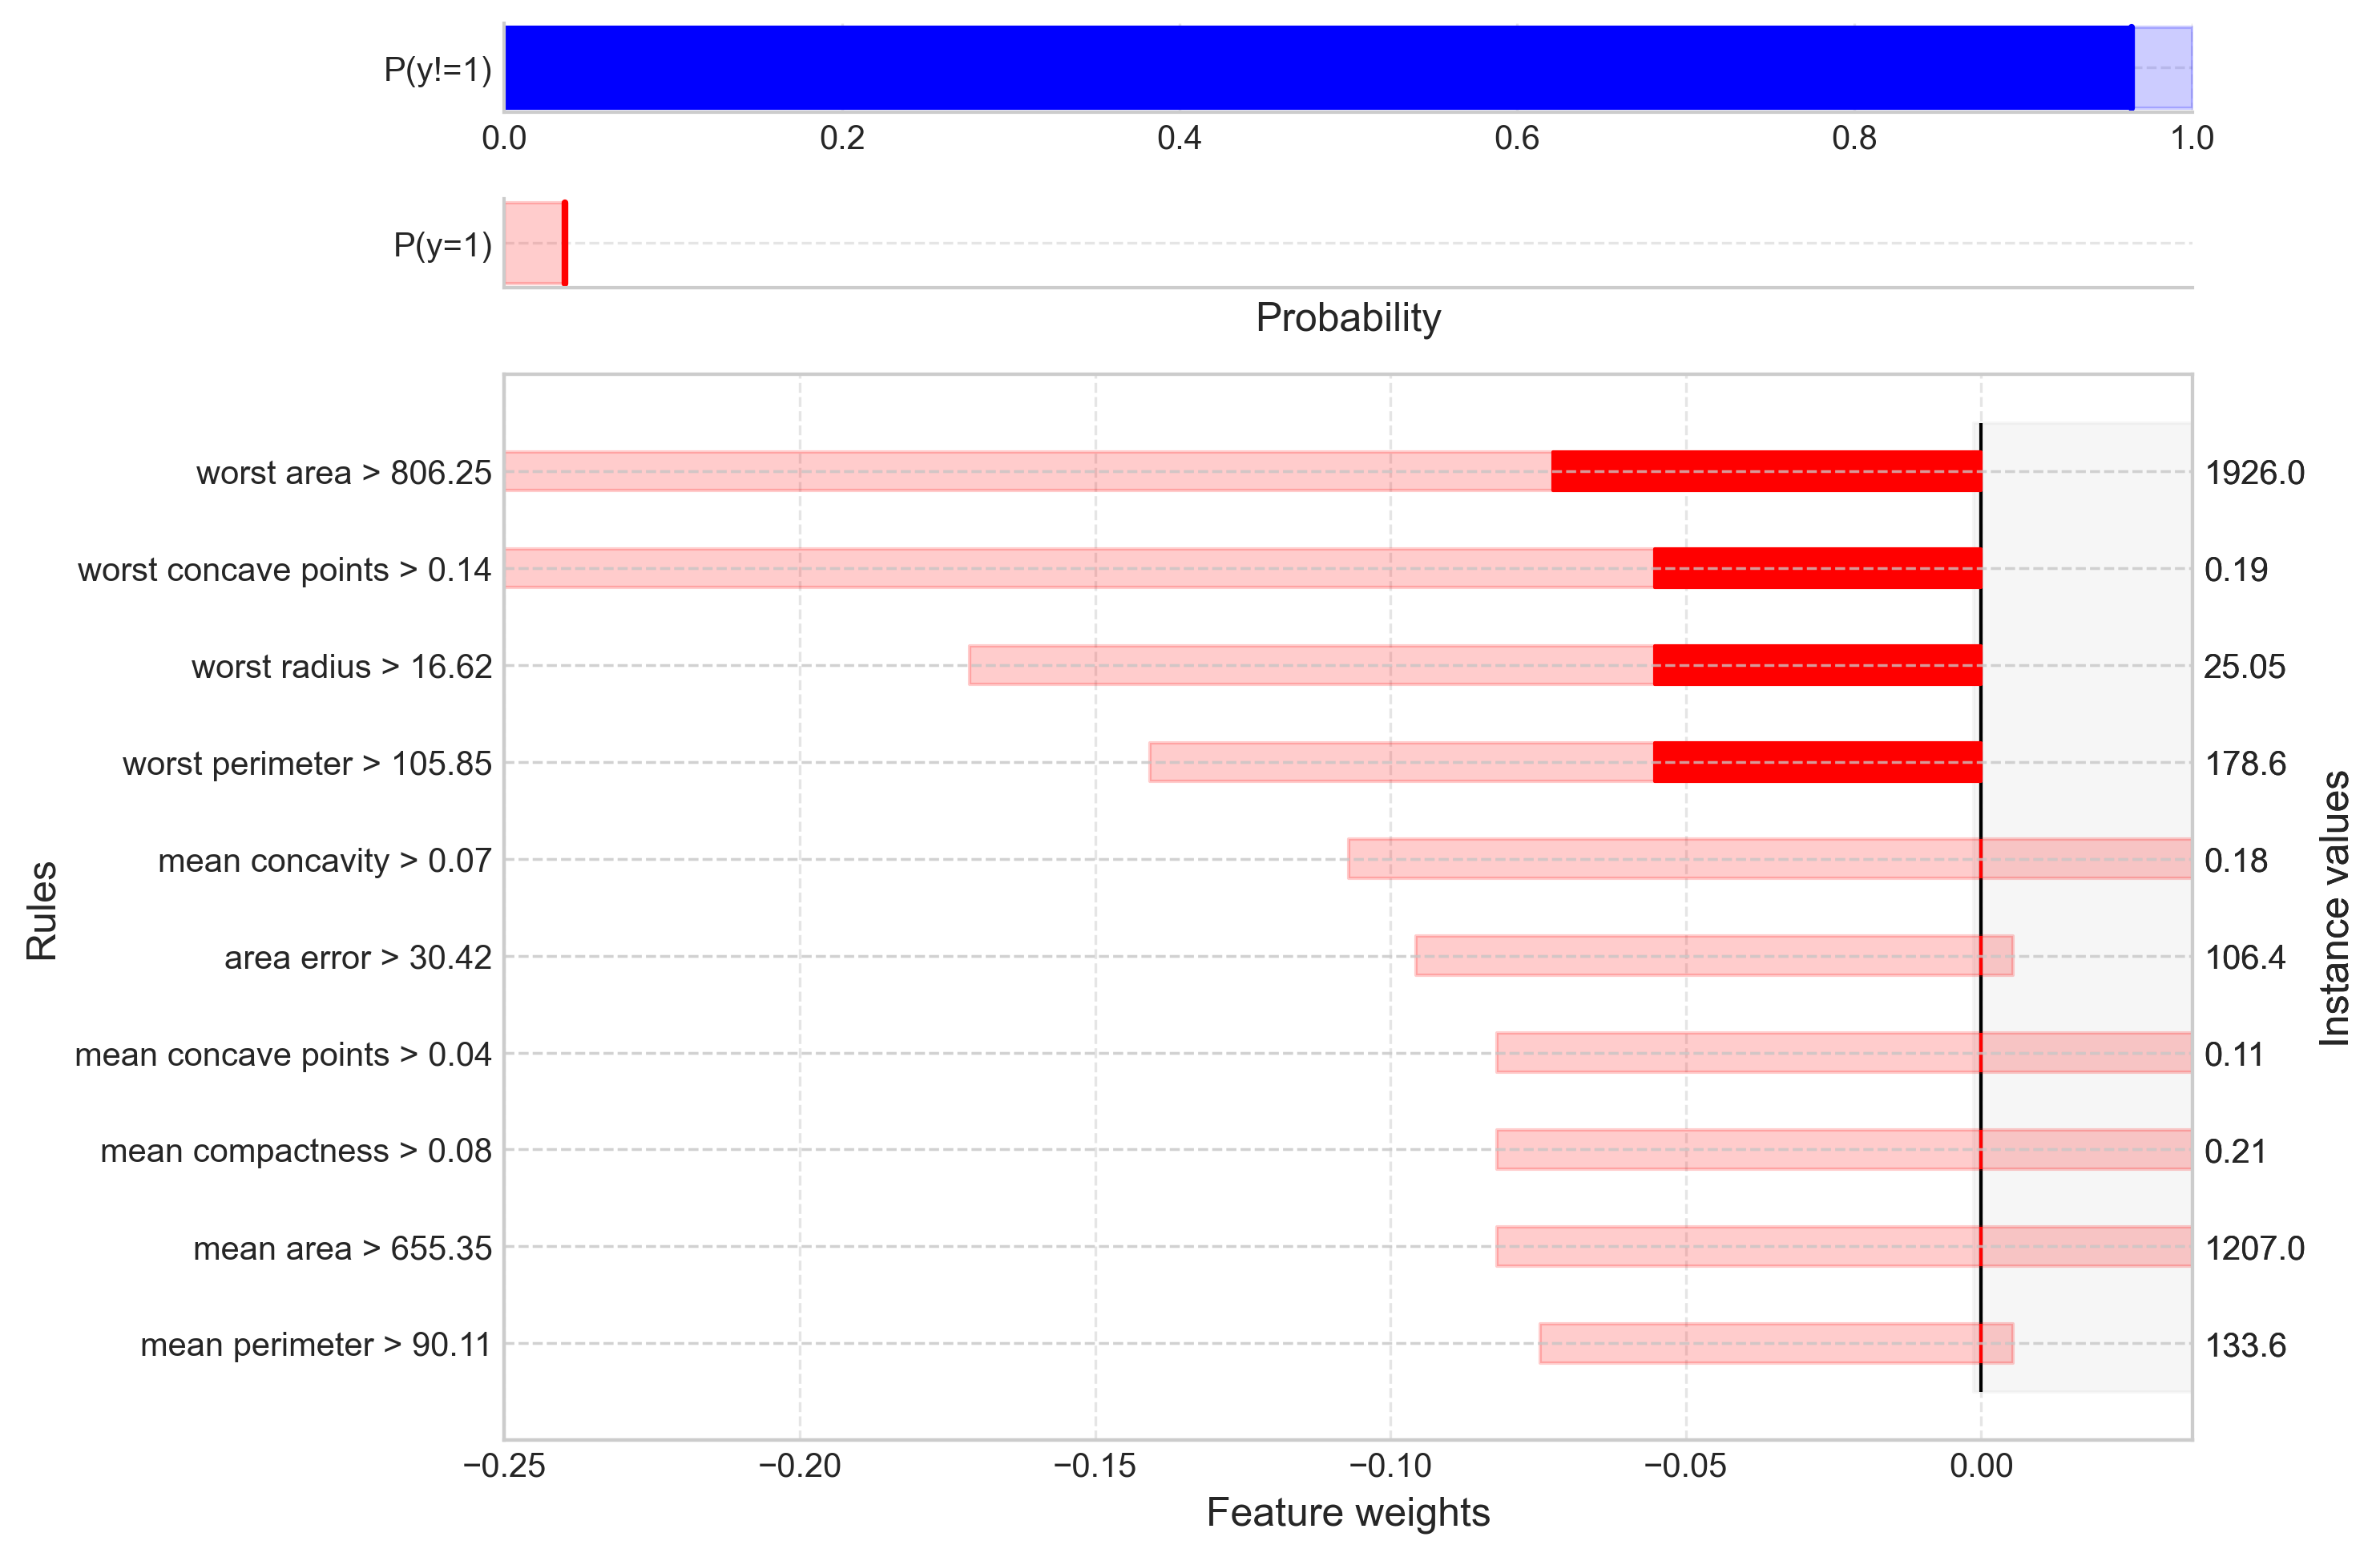

In [2]:
# Create a CalibratedExplainer using the calibration set
explainer = CalibratedExplainer(model, X_cal, y_cal, feature_names=feature_names)

# Explain a single instance (factual) and plot with uncertainty
factual = explainer.explain_factual(X_test[:1])
print('Factual explanation object created for single instance')
factual.plot(uncertainty=True)

Alternative explanations created


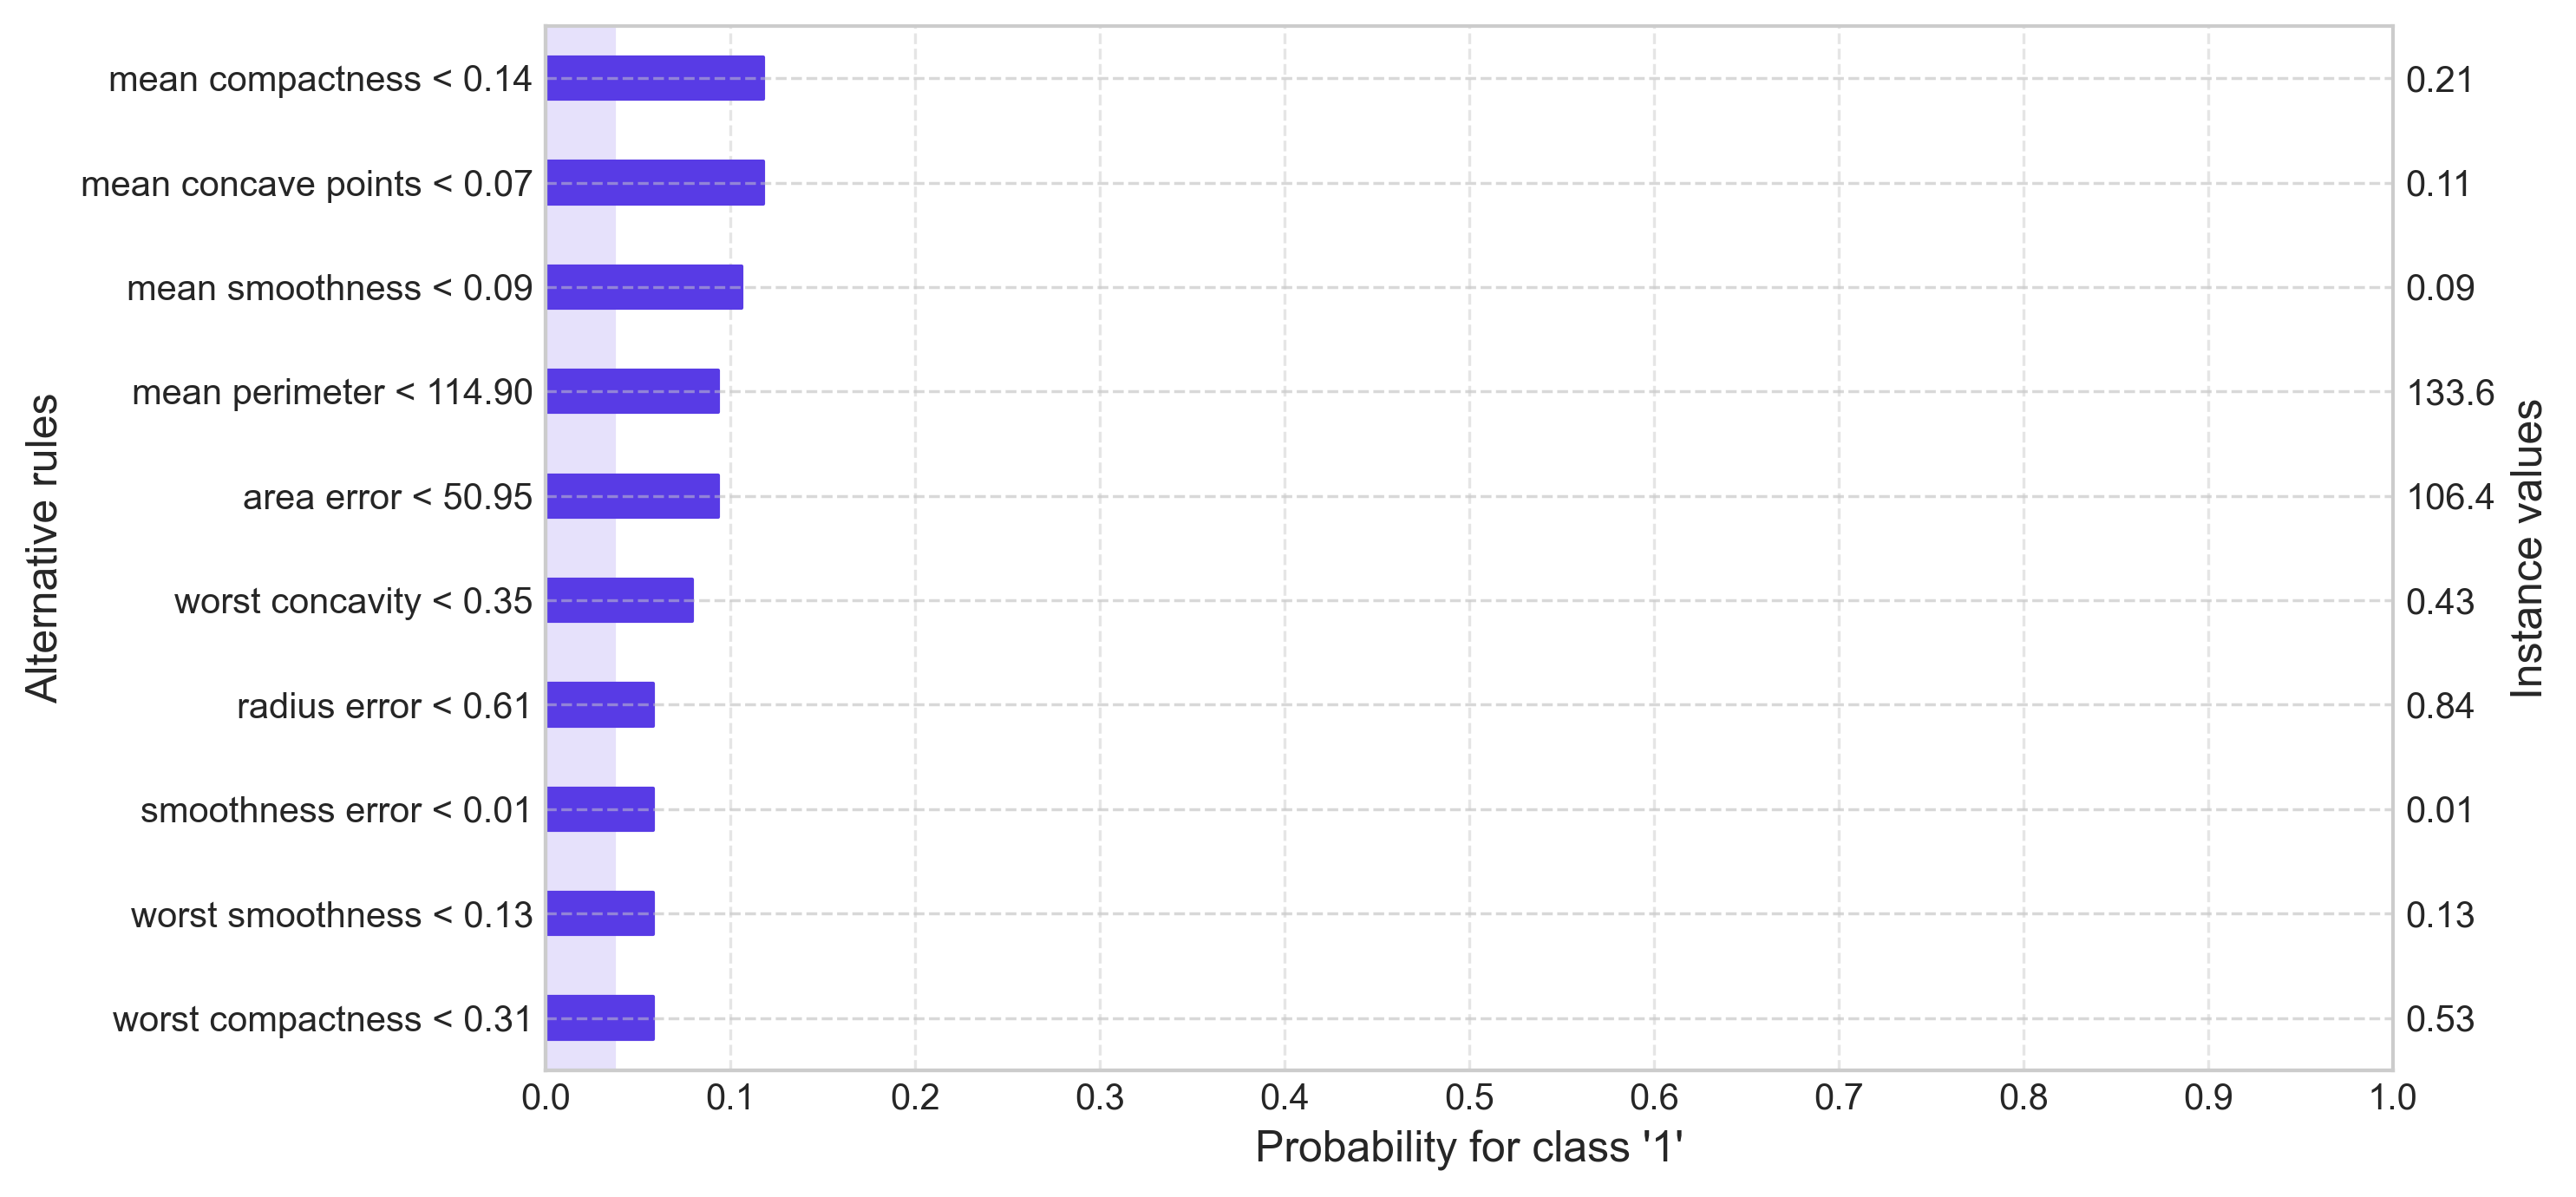

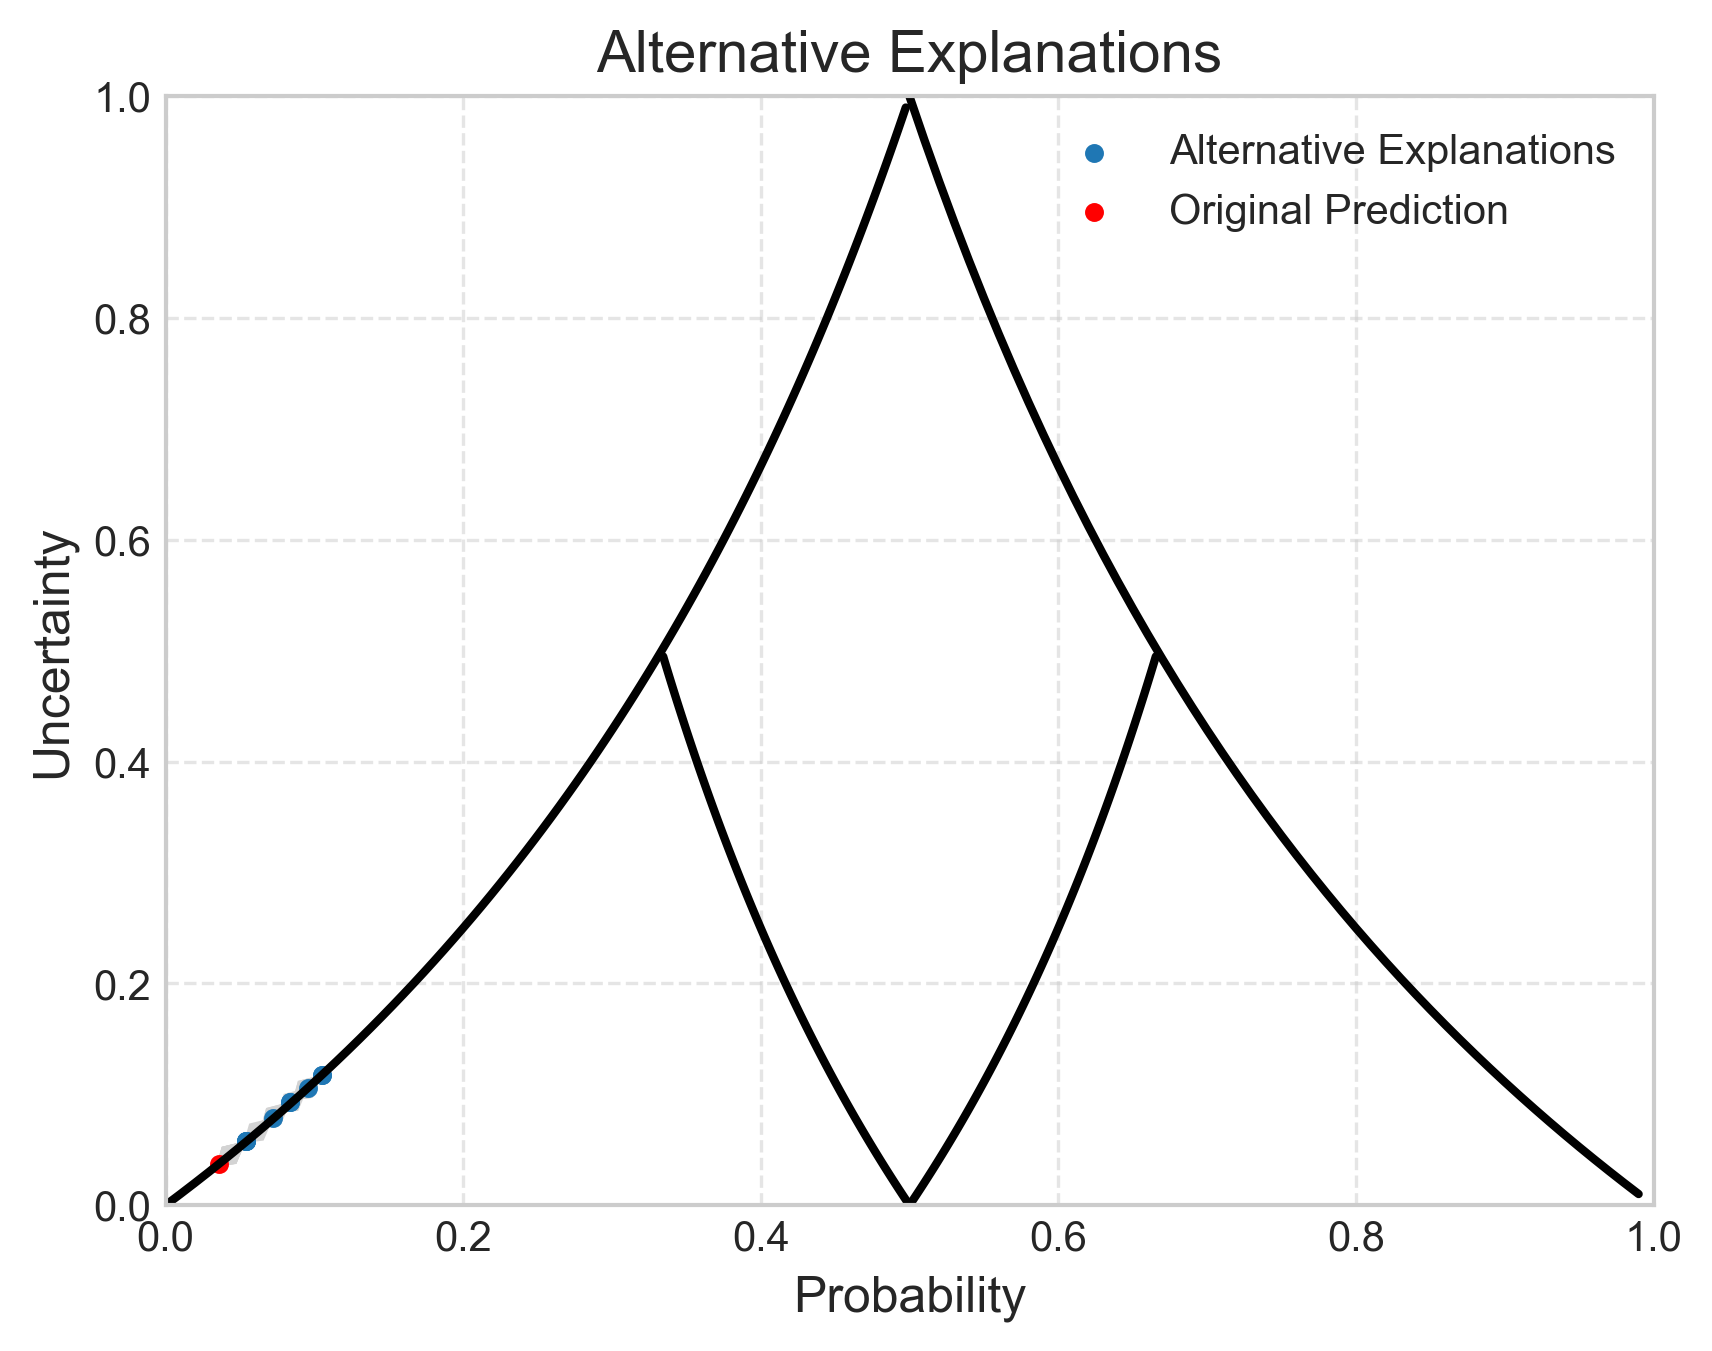

In [3]:
# Explore alternatives for the same instance and plot
alternatives = explainer.explore_alternatives(X_test[:1])
print('Alternative explanations created')
alternatives.plot()

# Triangular style is useful for probabilistic/regression examples but still informative here:
try:
    alternatives.plot(style="triangular")
except Exception:
    pass  # triangular style optional

Notes:
- This tiny notebook uses a toy dataset so it's fast to iterate locally.
- For deeper understanding, run `quickstart.ipynb` and the regression demos.
- If plotting fails due to optional plotting dependencies in your environment, the explanation objects can still be inspected programmatically using `_get_rules()` and `to_telemetry()` methods (see `demo_under_the_hood.ipynb`).